# temporary title： Predicting Algerian Forest Fires

## Introduction

Followings are some provisional writings.

We want to study whether temperature and rainfall play a significant role in determining whether or not wildfire will occur in a forest area. We consider that some specific local conditions (such as some weather phenomena peculiar to the area) may affect the conditions of fire occurrence when selecting a specific region in Algeria. In order to prevent the occurrence of special conditions, the data set we used includes two regions in Algeria named the Bejaia Region and the Sidi Bel-Abbes Region, which are located on either side of the whole country,  with the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of  Algeria respectively. The data set has 122 instances for each region, so the data for both regions are fairly evenly distributed.

research question: do temperature and rainfall play a significant role in determining whether or not forest fire will occur?

If the accuracy of our trained knn model is high, that means temperature and rainfall do play a significant role, because taking these two factors into consideration correctly predicted whether a forest fire would occur to a large extent.

priliminary analysis of the graph (figure 1) also clearly shows the demarcation line between fire(red) and non-fire(blue) is very clear, which means a forest fire is more likely to occur under high temperature and low rainfall, with rainfall being the dominant factor (should we mention this?).

## Methods & Results

The required R packages are loaded into R for data cleaning and analysis.

In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

The following code imports the original "Algerian forest fires" dataset from the internet. The first row is excluded because it contains the title of the dataset, which would affect analysis later on if not properly removed.

In [8]:
set.seed(1)
messy_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv", skip=1) 
messy_data

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


Table 1. Original dataset that contains the data for the Bejaia region and the Sidi Bel-Abbes region

Several cleaning steps were executed to wrangle and clean the messy data to a format that is acceptable for k-nn analysis. Firstly, we removed row 124 because it contained unwanted non-numerical data headings. Secondly, we removed all NAs present in the dataset using the na.omit function. Lastly, we manipulated the "Classes", "Rain" and "Temperature" columns of the clean data into the appropriate data classes.

In [9]:
set.seed(1)
messy_data<-messy_data[-c(124),]
still_messy_data<- na.omit(messy_data)
data<-still_messy_data%>%
    mutate(Classes=as.factor(Classes))
data$Rain <- as.numeric(as.character(data$Rain))
data$Temperature<-as.numeric(as.character(data$Temperature))
data

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


Table 2. Cleaned dataset that contains the data for the Bejaia region and the Sidi Bel-Abbes region

The count and the proportion of each class (fire or no fire) in the original dataset was determined.

In [10]:
data%>%
group_by(Classes)%>%
summarize(n=n(), prop= n()/(243))

`summarise()` ungrouping output (override with `.groups` argument)



Classes,n,prop
<fct>,<int>,<dbl>
fire,137,0.563786
not fire,106,0.436214


Table 3. Count and proportion of each class

From this table, we can see that count of both classes are fairly evenly distributed. This represents that there are no rare classes in the dataset, and thus, no oversampling steps are required.

With the clean data in hand, we split the clean dataset by half into a training and a testing set. The class of the testing set were also removed.

In [11]:
set.seed(1)
data_split<-initial_split(data,prop=0.50, strata=Classes)
data_train<-training(data_split)
data_test_messy<-testing(data_split)

data_train
data_test<-data_test_messy%>%
    select(-Classes)
data_test


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
07,06,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
15,06,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6
23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2
25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3


Table 4. Training set. Table 5. Testing set without classes

The rationale behind splitting the orginal dataset into a training and testing set is to build a model using the training data, and to assess the predicitability of the model using the testing data.
The proportion of the original dataset that is split between the training and testing set can have strong effects on the accuracy of the model or the evaluation. We decided to split the dataset equally among a training and testing set so that there is an equal tradeoff between an accurate model with an accurate evaulation. 


Before the k-nn analysis, we wanted to visualize the training set, using a scatterplot, to find interesting patterns in the classifications. We created a scatterplot with the Temperature variable on the x-axis and Rain amount variable on the y-axis. The data points on the scatterplot are colour coded by their respective class- a red colour would represent the occurence of a fire, while a blue colour would represent no fire occurence.

Temperature,Rain,Classes
<dbl>,<dbl>,<fct>
29,1.3,not fire
26,13.1,not fire
25,2.5,not fire
⋮,⋮,⋮
27,0.5,not fire
24,0.1,not fire
24,0.2,not fire


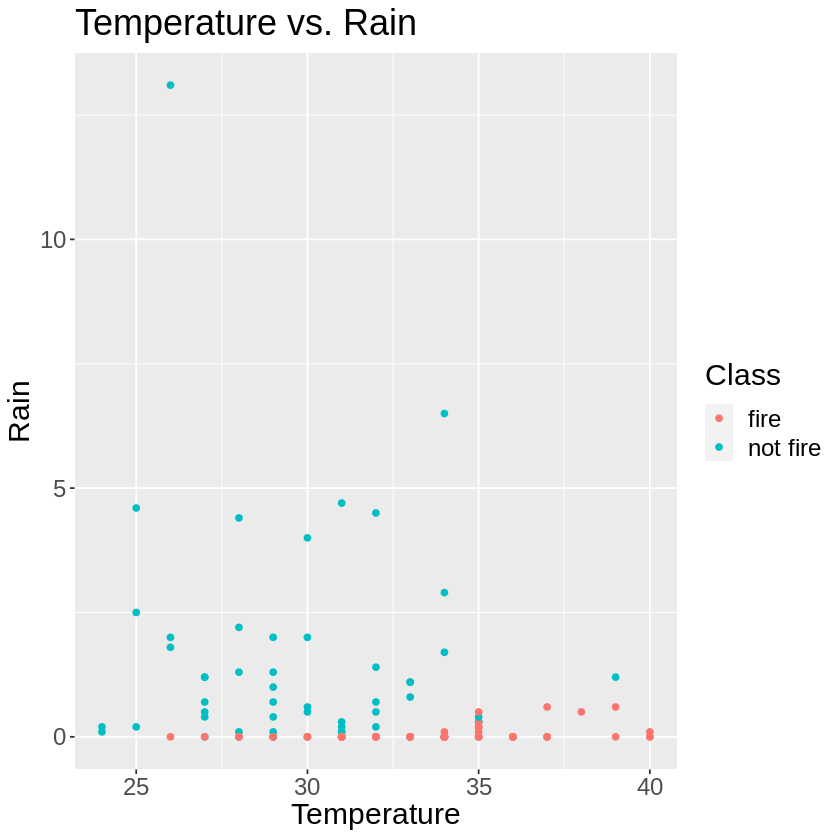

In [12]:
set.seed(1)
data_variables<-data_train%>%
    select(Temperature, Rain, Classes)
data_variables


data_plot_initial<-data_variables%>%
    ggplot(aes(x=Temperature, y=Rain, group=Classes))+
    geom_point(aes(color= Classes))+
    labs(x="Temperature", y="Rain", color="Class", title= "Temperature vs. Rain")+
    theme(text=element_text(size=18))+
    scale_x_continuous()
          
data_plot_initial


Table 6. Predictors used in analysis. Figure 1. Scatterplot of Rain and Temperature variables

Using a scatterplot is the most appropriate visual analysis because k-nearest neighbours relies on the majority vote of neighbouring points in a scatterplot to classify a new observation. Other plots, such as a pie chart or line graph, are not suitable because we are not looking for the proportion of each class or a time series plot.

Using the v-fold function, the training data underwent 10 evenly-structured splits into training and validation sets.

In [13]:
set.seed(1)
data_vfold<-vfold_cv(data_train, v=10,  strata= Classes) 

By splitting the data into 10 folds, there are now 10 different possibilities for the validation set. We decided to select 10 folds because the overall cross-validation accuracy is based on the average of 10 estimate accuracies of the validation set. By choosing 10 folds, we further minimize the influence of a poor validation sets, and gain a better estimate of the true accuracy.

The predictors are first scaled so that they are all standardized. Proceeding that step, a k-nn classification model with tuned parameters is specified. The final workflow includes the specified recipe, specified k-nn classification model, an argument that tries 10 k- values, and an argument that provides the accuracy of the predictions.

In [14]:
#Recipe:
data_recipe<- recipe( Classes~ Temperature+ Rain, data= data_train)%>%
step_scale(all_predictors())%>%
step_center(all_predictors()) 

data_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune())%>%
    set_engine("kknn")%>%
    set_mode("classification")

data_workflow<-workflow()%>%
    add_recipe(data_recipe)%>%
    add_model(data_spec)%>%
    tune_grid(resamples=data_vfold,grid=10)%>%
    collect_metrics()

data_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.8502914,10,0.02523510,Model1
2,roc_auc,binary,0.8928571,10,0.02242818,Model1
3,accuracy,binary,0.8614219,10,0.02053580,Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,roc_auc,binary,0.8880952,10,0.03160285,Model8
14,accuracy,binary,0.8195221,10,0.03052140,Model9
14,roc_auc,binary,0.8954762,10,0.03115006,Model9


Table 7. Estimated prediction accuracy of each k- nearest neighbour

The accuracy estimate of each k-value is filtered from the metrics dataset and plotted on a line plot with their respective k-value.

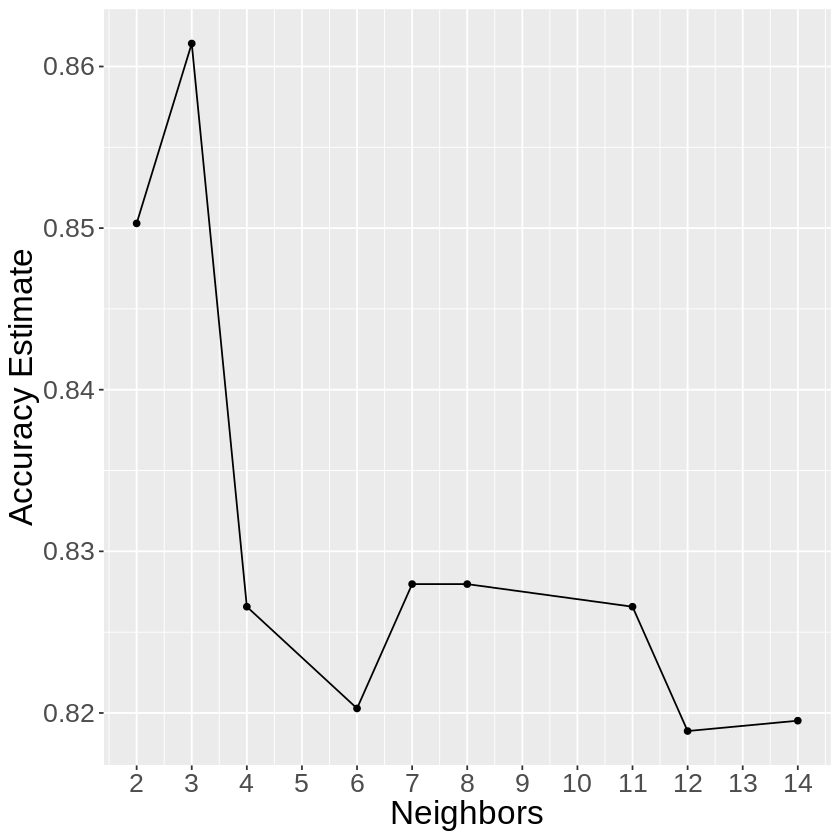

In [15]:
set.seed(1)

accuracies<-data_workflow%>%
    filter(.metric=="accuracy")

accuracy_versus_k<-ggplot(accuracies, aes(x=neighbors, y=mean))+
    geom_point()+
    geom_line()+
    labs(x="Neighbors", y="Accuracy Estimate")+
    theme(text=element_text(size=20))+
    scale_x_continuous(breaks = seq(0, 14, by = 1)) 

accuracy_versus_k

Figure 2. Line graph of the accuracy estimate for each neighbour

The purpose of producing a line plot is to visualize the estimate of the true accuracy for each k-value, and help us select the number of neighbours that is most appropriate for the classification model. We decided to select the k-value that had the greatest percent accuracy, and had nearby k-values that did not differ significantly in accuracy (<1% accuracy difference). The line visualization of estimated accuracies suggests that a k-value of 7 is the most appropriate number because it offered a satisfactory amount of accuracy and doesn't have major estimate accuracy differences with it's nearby k-values. Values we see on this plot are estimates of the true accuracy of our classifier. Although the  𝐾= 2, 3 value is higher than all the others on this plot, that doesn’t mean the classifier is necessarily more accurate with this parameter value.

In the final few steps, we retrained k-nn model using k = 7 it is used on the testing set to predict the classes and calculate the accuracy of the predicitions. 

In [16]:
set.seed(1)
testdata_spec<-nearest_neighbor(weight_func="rectangular",neighbors=7)%>%
    set_engine("kknn")%>%
    set_mode("classification")

testdata_recipe<- recipe( Classes~ Temperature+Rain, data= data_train)%>%
step_scale(all_predictors())%>%
step_center(all_predictors()) 

testworkflow<-workflow()%>%
    add_recipe(testdata_recipe)%>%
    add_model(testdata_spec)%>%
    fit(data= data_train)

prediction_test_data<- testworkflow%>%
    predict(data_test)%>%
    bind_cols(data_test_messy)
prediction_test_data

prediction_test_data_metrics<-prediction_test_data%>%
    metrics(truth= Classes, estimate =.pred_class)
    
prediction_test_data_metrics

prediction_test_data_classes<-prediction_test_data%>%
    select(.pred_class, Classes)


.pred_class,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
fire,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
fire,07,06,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
not fire,15,06,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1,not fire
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fire,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire
fire,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire
not fire,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8181818
kap,binary,0.6179679


Table 8. Testing set with both classes and predicted classes. Table 9. Prediction accuracy of the k-nn model

## Discussion (first 2 points)

From the scatterplot based on the training data(Figure 1), we can observe that a fire generally occurs where there are low amounts of rain at high temperatures or no rain at lower temperatures. On the other hand, there are generally no fires when there are high amounts of rain at lower temperatures. This relationship suggests that temperature and rain are important factors for predicting forest fires, as a preliminary finding.

For the result of our data analysis, our retrained k-nn model using k = 7 is about 0.818, quite close to the accuracy estimate for k = 7 (0.828). This high level of accuracy is satisfactory, which means temperature and rainfall do play a significant role, because taking these two factors into consideration mainly predicted whether a forest fire would occur correctly. This result is consistent with our expectation, that is what exactly what we expected to find.

Abid & Izeboudjen (2020) also did the prediction based on the same dataset. Different with our methodology, they used more factors as predictors, including temperature, relative humidity and wind speed. They have established a DT based forest fire prediction system based on decision tree, which is an intelligent sensor node architecture. It can predict fire in an automatic and intelligent way without requiring human intervention. Compared with their resulting accuracy (82.92%), our accuracy (81.82%) are quite close. This suggests that our evaluation that temperature and rain are important factors is reliable and solid.


## References

Abid, F., & Izeboudjen, N. (2020). Predicting forest fire in Algeria using data MINING Techniques: Case study of the decision tree algorithm. Advances in Intelligent Systems and Computing, 363-370. doi:10.1007/978-3-030-36674-2_37

Natural Resources Canada (n.d.). Canadian Forest Fire Weather Index (FWI) System. Retrieved 
from https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi